In [15]:
from glob import glob
import pandas as pd
from kid_readout.analysis.resonator import legacy_resonator, plot_resonator

In [24]:
def load_s2p_re_im(filename):
    f_GHz, S11RE, S11IM, S21RE, S21IM, S12RE, S12IM, S22RE, S22IM = np.loadtxt(filename, unpack=True, skiprows=23)
    
    df = pd.DataFrame.from_dict({'f': 1e9 * f_GHz,
                                 's11': S11RE + 1j * S11IM,
                                 's21': S21RE + 1j * S21IM,
                                 's12': S12RE + 1j * S12IM,
                                 's22': S22RE + 1j * S22IM})
    return df


def fit_resonators(dfs, offset=0.6e-3):
    rs = []
    for df in dfs:
        f_center = df.f.mean()
        mask = np.array((f_center * (1 - offset) < df.f) & (df.f < f_center * (1 + offset)))
        rs.append(legacy_resonator.Resonator(np.array(df.f), np.array(df.s21), mask=mask))
    return rs

In [4]:
directory = '/Users/daniel/Johnson+Miller/mkid/multichroic/wafers/TwoLayer01/'

In [6]:
mag38 = [load_s2p_re_im(f) for f in glob(directory + '*.s2p')]

In [21]:
[df.f.max() for df in mag38]

[2436500000.0, 3489000000.0, 3631500000.0, 3802500000.0, 2000000000.0]

In [25]:
rs38 = fit_resonators(mag38[:-1])

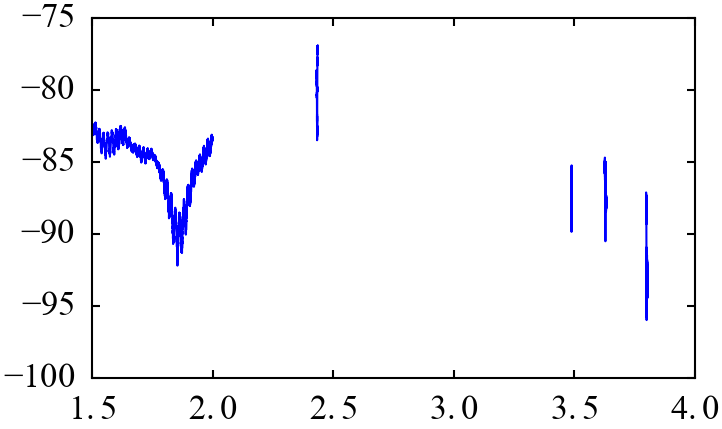

In [20]:
fig, ax = plt.subplots()

for df in mag38:
    ax.plot(1e-9 * df.f,
            20 * np.log10(np.abs(df.s21)),
            color='blue')

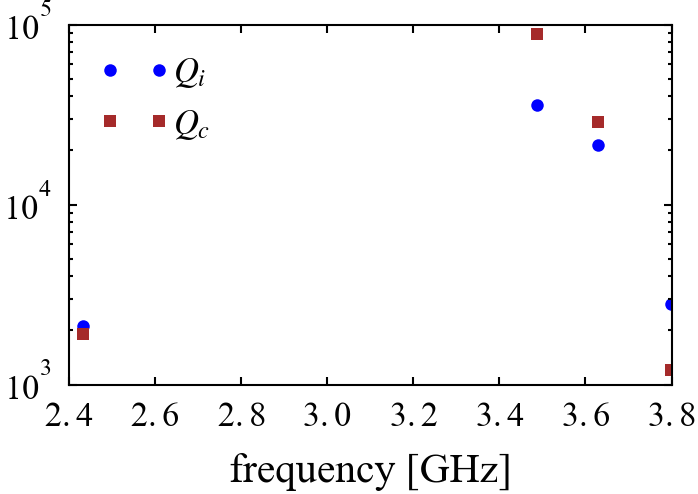

In [30]:
fig, ax = plt.subplots()

ax.plot([1e-9 * r.f_0 for r in rs38],
        [r.Q_i for r in rs38],
        marker='o', markeredgecolor='none', linestyle='none',
        color='blue', label='$Q_i$')

ax.plot([1e-9 * r.f_0 for r in rs38],
        [r.Q_e_real for r in rs38],
        marker='s', markeredgecolor='none', linestyle='none',
        color='brown', label='$Q_c$')

ax.set_yscale('log')
ax.legend(loc='best')
ax.set_xlabel('frequency [GHz]');

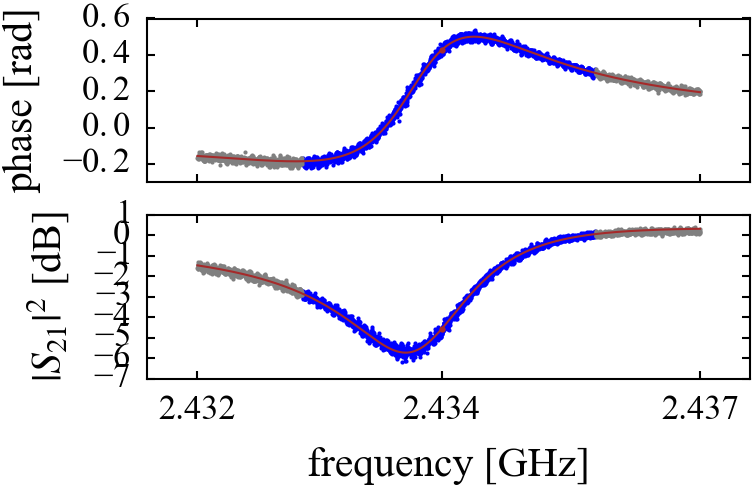

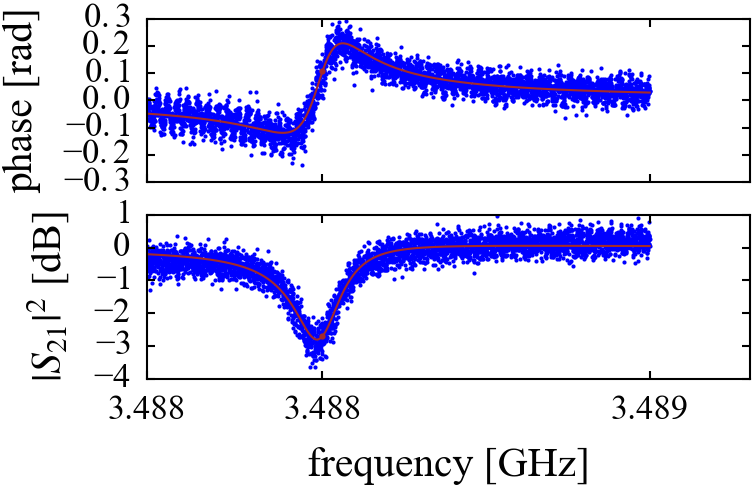

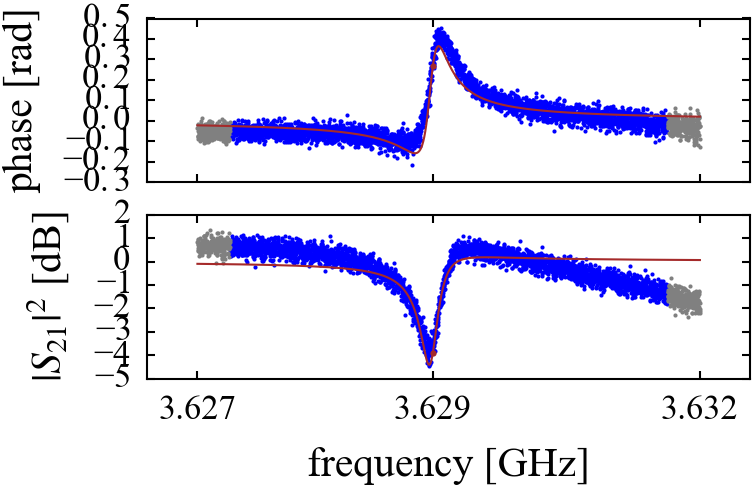

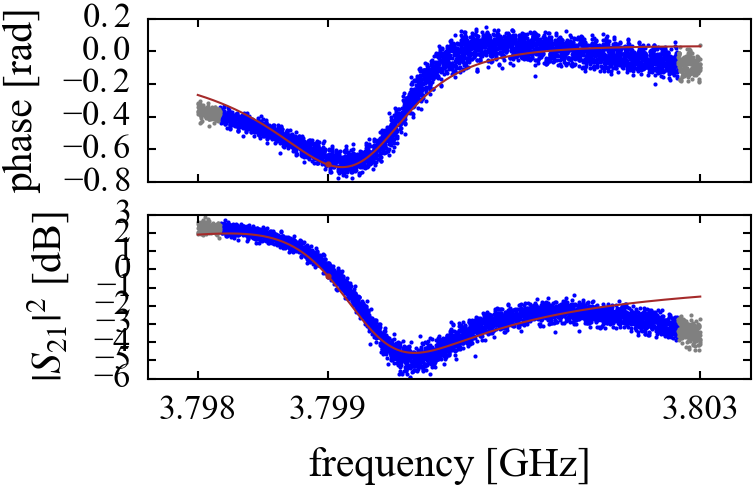

In [26]:
for r in rs38:
    plot_resonator.amplitude_and_phase(r, normalize_s21=True, freq_scale=1e-9, xlabel='frequency [GHz]')